**Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.**

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link


**Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.**

In [10]:
import pandas as pd
df=pd.read_csv('/content/heart_disease_dataset.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**No Null Values found in dataset**

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
df.nunique().sort_values()

,0
sex,2
fbs,2
exang,2
target,2
restecg,3
slope,3
cp,4
thal,4
ca,5
oldpeak,40


**No Encoding is required as all dataypes are already in numerical format**

**Q2. Split the dataset into a training set (70%) and a test set (30%).**

In [16]:
X=df.drop(labels=['target'],axis=1)
y=df[['target']]

In [17]:
y.value_counts()

,count
target,
1,165
0,138


In [18]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)
Xtrain.shape

(212, 13)

In [19]:
Xtest.shape

(91, 13)

**Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.**

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(Xtrain,ytrain.values.flatten())

RandomForestClassifier(max_depth=10)

**Q4. Evaluate the performance of the model on the test set using accuracy precision, recall, and F1 score.**

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def evaluate_model(x,y,model):
  ypred=model.predict(x)
  acc_score=accuracy_score(y,ypred)
  prec_score=precision_score(y,ypred)
  rec_score=recall_score(y,ypred)
  f1=f1_score(y,ypred)
  print(f'Accuracy score: {acc_score}')
  print(f'Precision Score: {prec_score}')
  print(f'Recall Score: {rec_score}')
  print(f'f1 score: {f1}')
  return acc_score,prec_score,rec_score,f1



In [56]:
acc_base, prec_base,rec_base, f1_base = evaluate_model(Xtest,ytest,rfc)

Accuracy score: 0.8021978021978022
Precision Score: 0.8333333333333334
Recall Score: 0.8
f1 score: 0.816326530612245


<Axes: >

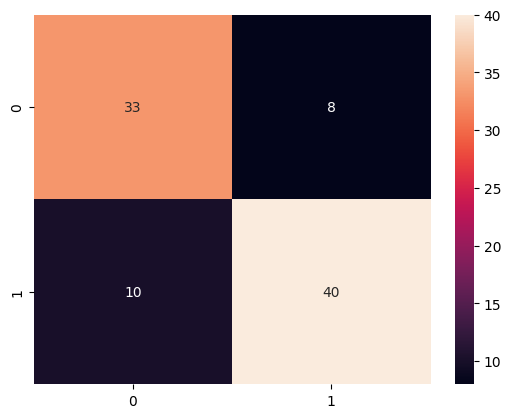

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ypred_test=rfc.predict(Xtest)
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf, annot=True, fmt='d')

**Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.**

In [58]:
rfc.feature_importances_

array([0.08747012, 0.03831227, 0.11324863, 0.07009921, 0.06850283,
       0.01004704, 0.01788445, 0.12126017, 0.05702963, 0.11158685,
       0.06146024, 0.14140992, 0.10168865])

In [59]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [65]:
imp=pd.Series(rfc.feature_importances_)
imp.index=rfc.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

,0
ca,0.141410
thalach,0.121260
cp,0.113249
oldpeak,0.111587
thal,0.101689
age,0.087470
trestbps,0.070099
chol,0.068503
slope,0.061460
exang,0.057030


In [66]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'thalach', 'cp', 'oldpeak', 'thal']


<Axes: title={'center': 'Feature Importances Plot'}>

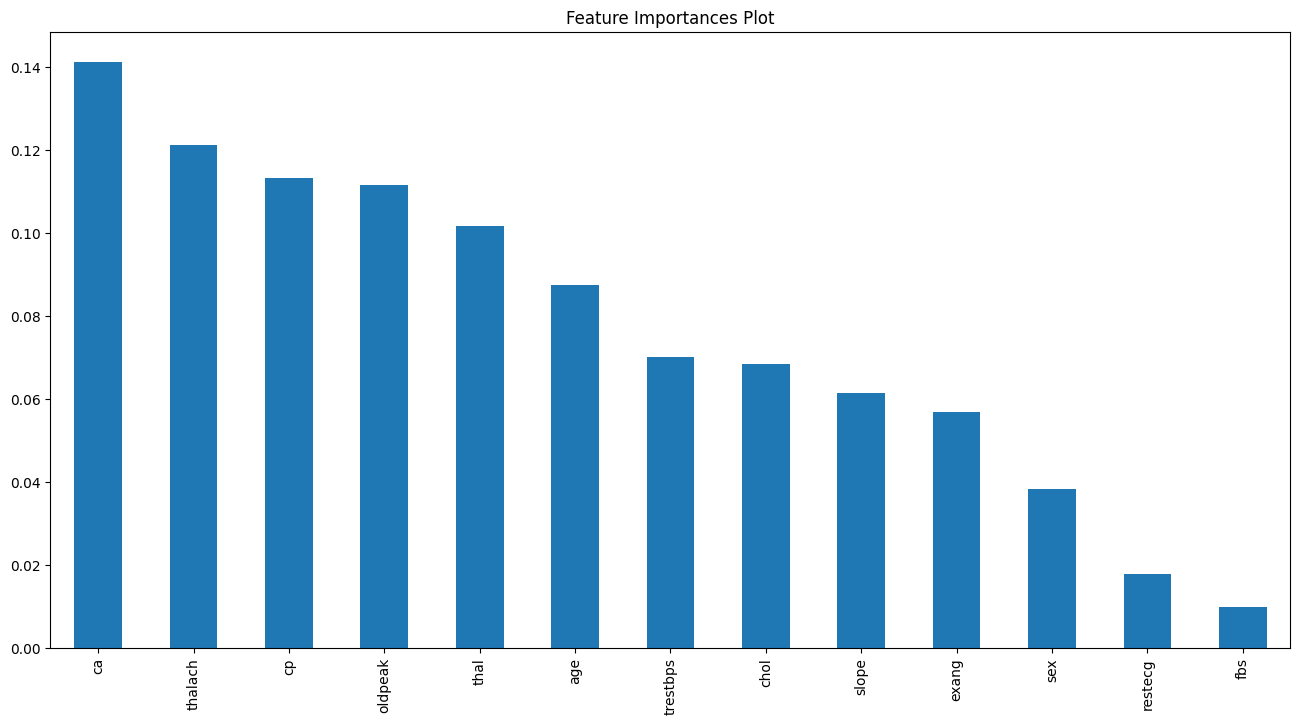

In [67]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

**Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.**

In [68]:
params={
    'n_estimators': [10,50,100,200,300,400],
    'max_depth': [4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [2,5,10]
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(RandomForestClassifier(),param_distributions=params,n_iter=50,scoring='f1',cv=5,verbose=3)
rscv.fit(Xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.857 total time=   0.3s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.784 total time=   0.3s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.913 total time=   0.3s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.837 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.826 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=10;, score=0.824 total time=   0.1s
[CV 4

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [70]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_depth': 5}

In [72]:
rscv_tuned=rscv.best_estimator_

In [73]:
rscv.best_score_

0.8579310122501612

In [74]:
acc_tuned,prec_tuned,rec_tuned,f1_tuned=evaluate_model(Xtest,ytest,rscv_tuned)

Accuracy score: 0.8571428571428571
Precision Score: 0.8627450980392157
Recall Score: 0.88
f1 score: 0.8712871287128714


**Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.**

In [75]:
dct={
    'Base Model':[acc_base,prec_base,rec_base,f1_base],
    'Tuned_model':[acc_tuned,prec_tuned,rec_tuned,f1_tuned]
}

In [77]:
df_compare=pd.DataFrame(dct)
df_compare

,Base Model,Tuned_model
0,0.802198,0.857143
1,0.833333,0.862745
2,0.800000,0.880000
3,0.816327,0.871287


**All parameters of the tuned model increases all scores.**

**Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.**

In [78]:
rscv_tuned.feature_importances_

array([0.05767652, 0.03961916, 0.17889794, 0.01776324, 0.02212257,
       0.        , 0.0095772 , 0.0842932 , 0.12406956, 0.08638751,
       0.08387236, 0.18205045, 0.1136703 ])

In [79]:
rscv_tuned.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [82]:
imp_tuned=rscv_tuned.feature_importances_
imp_tuned=pd.Series(imp_tuned)
imp_tuned.index=rscv_tuned.feature_names_in_
imp_tuned=imp_tuned.sort_values(ascending=False)
imp_tuned

,0
ca,0.182050
cp,0.178898
exang,0.124070
thal,0.113670
oldpeak,0.086388
thalach,0.084293
slope,0.083872
age,0.057677
sex,0.039619
chol,0.022123


<Axes: title={'center': 'Feature Importances for tuned model'}>

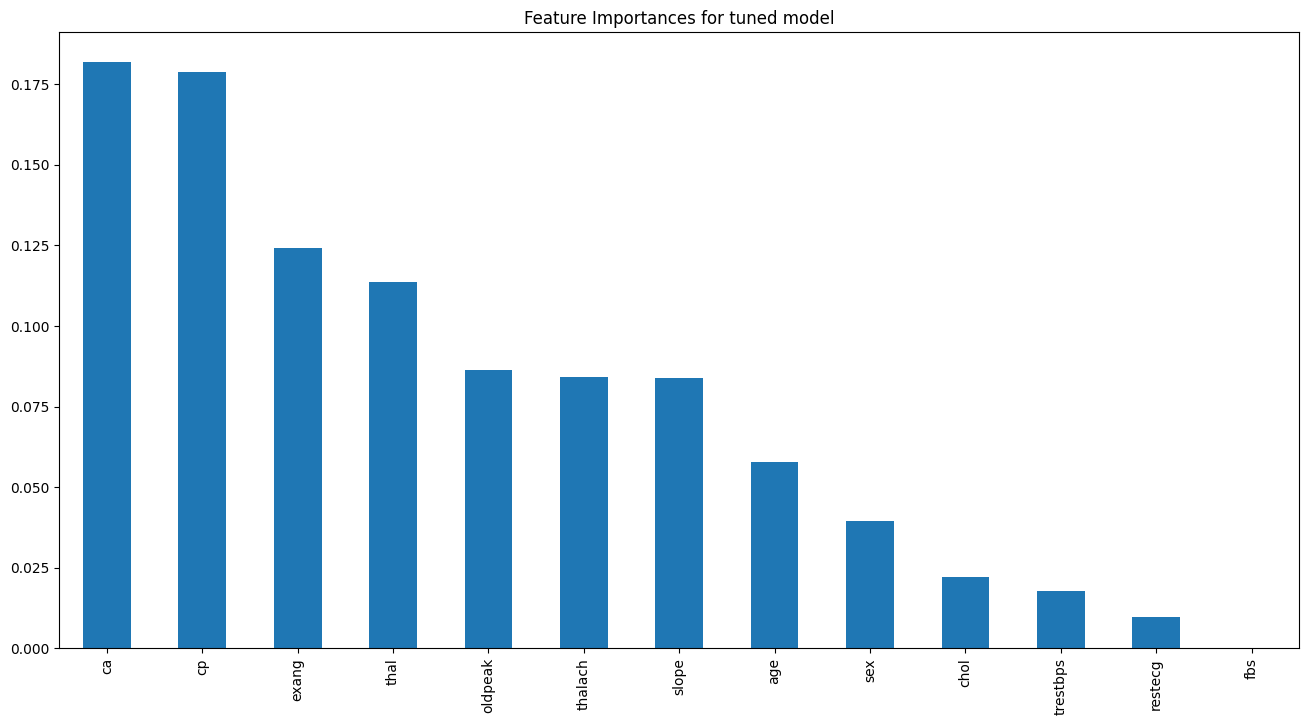

In [83]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [85]:
top2 = Xtrain[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [86]:
df_top2 =pd.concat([top2,ytrain],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


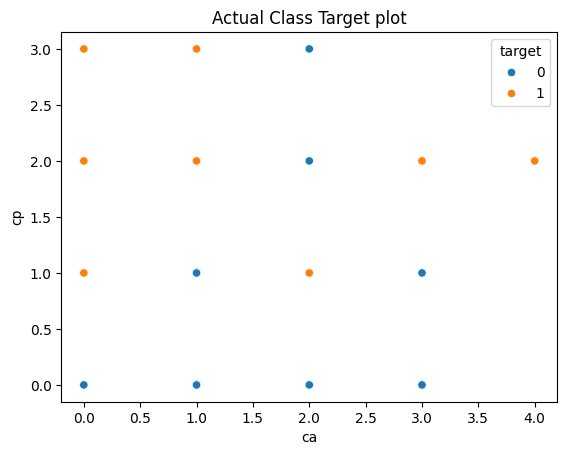

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [92]:
df_top2['predicted'] = rscv_tuned.predict(Xtrain)

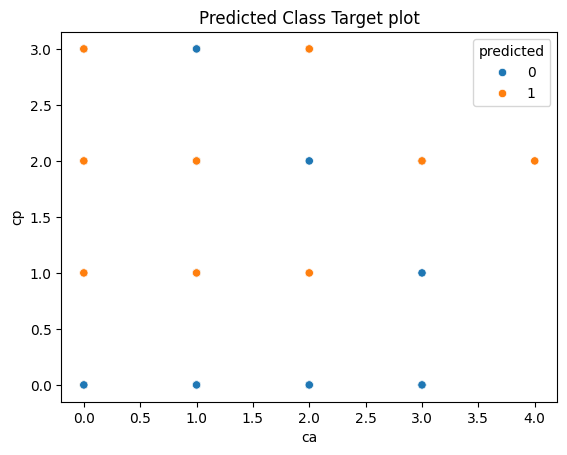

In [93]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()